In [60]:
import pandas as pd
import numpy as np
from pymysql import connect
import os
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


user = "estadistica"
password = "Estadistica2024!!"
host = "54.94.131.196"


#Conexion al DATALAKE ECONOMICO
conn_dl_economico = connect(user=user,password=password,host=host,database="datalake_economico")
cursor_dl_economico = conn_dl_economico.cursor()

#Conexion al DATALAKE ECONOMICO
conn_dwh_economico = connect(user=user,password=password,host=host,database="dwh_economico")
cursor_dwh_economico = conn_dwh_economico.cursor()

In [65]:
df_super_corr = pd.read_sql("SELECT * FROM supermercado_encuesta WHERE id_provincia_indec = 18",conn_dl_economico)
df_super_corr.to_excel("datos_corr_precio_corriente.xlsx")

/tmp/ipykernel_5827/1165598844.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_super_corr = pd.read_sql("SELECT * FROM supermercado_encuesta WHERE id_provincia_indec = 18",conn_dl_economico)


In [49]:
df_deflactado = pd.read_sql('SELECT * FROM supermercado_deflactado WHERE id_provincia_indec = 18',conn_dwh_economico)
df_deflactado

/tmp/ipykernel_5827/2594222374.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_deflactado = pd.read_sql('SELECT * FROM supermercado_deflactado WHERE id_provincia_indec = 18',conn_dwh_economico)


,fecha,id_region_indec,id_provincia_indec,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronica_hogar,otros
0,2017-01-01,5,18,414425.891532,55223.974281,93280.928771,19161.332555,31799.710020,52424.653122,16475.949863,13889.575699,53520.859732,11313.453598,27207.559535,39662.069641
1,2017-02-01,5,18,393554.096105,52277.269334,95111.702479,18678.892501,31539.134417,51979.759497,16524.547555,12775.205734,49428.093109,10054.448362,21156.316372,33553.135218
2,2017-03-01,5,18,400771.343548,52853.428861,101066.125407,19780.977190,32512.803226,52554.654599,17230.403306,13257.757888,51250.270276,9989.440218,21353.425573,30834.407452
3,2017-04-01,5,18,411524.235066,50280.324673,110553.618925,21049.554431,31650.966236,54256.122579,15848.447058,13309.966144,51006.932402,12887.983707,23611.241162,29449.348475
4,2017-05-01,5,18,390927.496548,42314.297385,100641.902610,19761.425514,29896.167973,49624.114859,14179.877376,12517.987065,48910.206875,14040.949159,30447.033033,29814.816273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2023-12-01,5,18,362776.475501,73596.567287,66509.406720,12378.019968,24954.736410,39250.820739,10924.852004,6873.979949,40024.131157,10900.049144,17093.067560,33760.414154
84,2024-01-01,5,18,282017.922783,46319.147132,52891.972571,10320.213678,23494.183008,28671.613084,10017.838724,5261.152254,34081.619661,6414.874133,12361.931826,24635.877263
85,2024-02-01,5,18,259887.036689,40663.266321,51263.344643,9717.900665,20869.634644,28810.387901,9996.009597,4865.157902,30093.036106,4932.400807,11456.422642,22770.221265
86,2024-03-01,5,18,278499.605630,40508.564606,64335.807035,10739.438047,22244.751275,31853.385039,10859.563695,5437.714119,31927.573867,5610.348714,12636.013197,21638.075597


In [50]:
df_ipc = pd.read_sql('SELECT * FROM ipc_valores WHERE id_region = 5',conn_dl_economico)
df_ipc

/tmp/ipykernel_5827/2576781154.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ipc = pd.read_sql('SELECT * FROM ipc_valores WHERE id_region = 5',conn_dl_economico)


,fecha,id_region,id_categoria,id_division,id_subdivision,valor
0,2016-12-01,5,1,1,1,100.0000
1,2017-01-01,5,1,1,1,101.6727
2,2017-02-01,5,1,1,1,103.4617
3,2017-03-01,5,1,1,1,105.9880
4,2017-04-01,5,1,1,1,108.3473
...,...,...,...,...,...,...
3865,2024-01-01,5,13,34,45,5123.3352
3866,2024-02-01,5,13,34,45,5865.5697
3867,2024-03-01,5,13,34,45,6384.0914
3868,2024-04-01,5,13,34,45,6729.2109


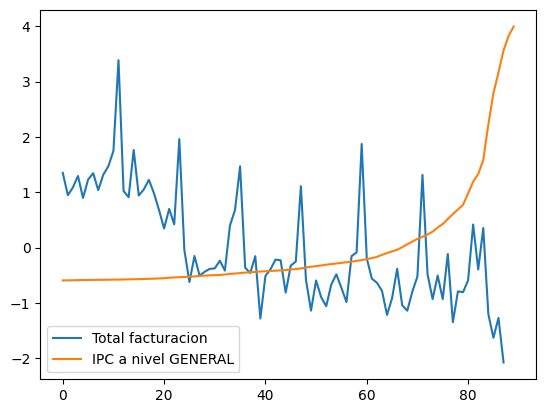

In [69]:
plt.plot((df_deflactado['total_facturacion'] - df_deflactado['total_facturacion'].mean()) / df_deflactado['total_facturacion'].std() , label = "Total facturacion")

plt.plot(((df_ipc['valor'][df_ipc['id_subdivision'] == 1] - df_ipc['valor'][df_ipc['id_subdivision'] == 1].mean()) / df_ipc['valor'][df_ipc['id_subdivision'] == 1].std()), label = "IPC a nivel GENERAL")
plt.legend()

[*********************100%%**********************]  1 of 1 completed


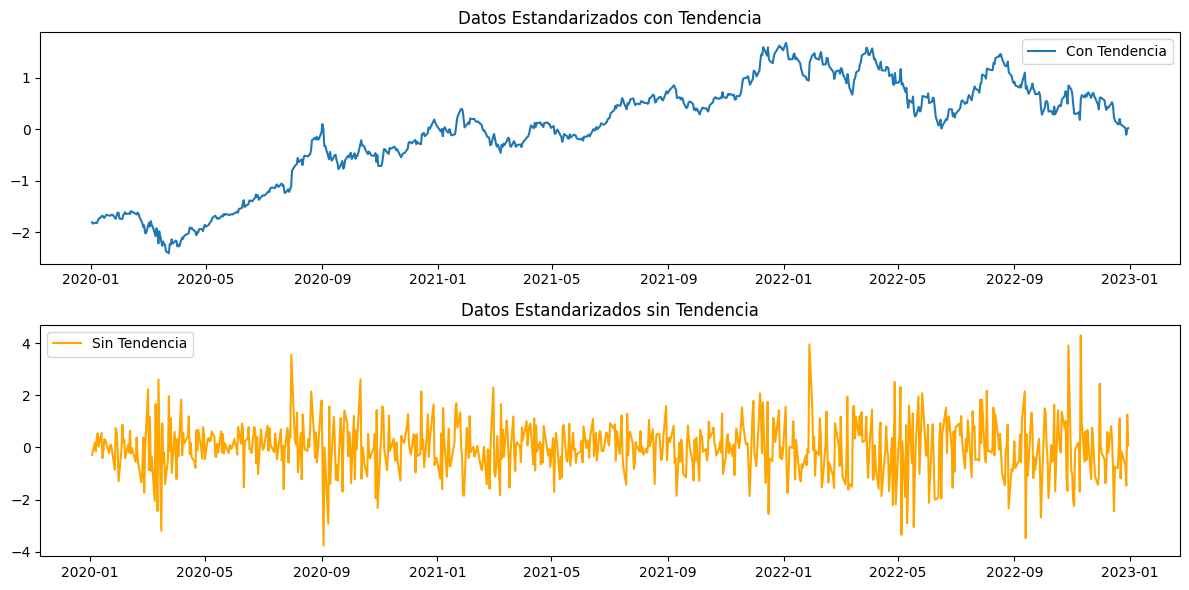

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Obtener los datos de una acción de Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Usar el precio de cierre ajustado para el análisis
closing_prices = data['Adj Close']

# Diferenciación para eliminar la tendencia
differenced_data = closing_prices.diff().dropna()

# Estandarizar los datos
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices.values.reshape(-1, 1))
differenced_data_scaled = scaler.fit_transform(differenced_data.values.reshape(-1, 1))

# Graficar los datos estandarizados
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(closing_prices.index, closing_prices_scaled, label='Con Tendencia')
plt.title('Datos Estandarizados con Tendencia')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(differenced_data.index, differenced_data_scaled, label='Sin Tendencia', color='orange')
plt.title('Datos Estandarizados sin Tendencia')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodel

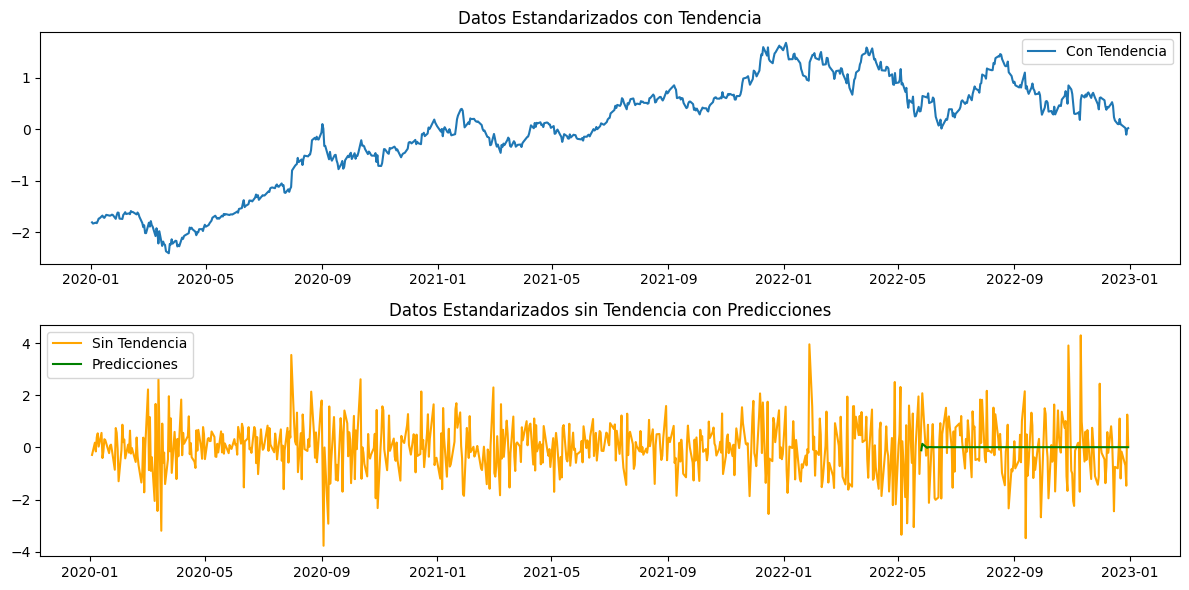

Mean Squared Error: 10.823925907666629


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Obtener los datos de una acción de Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Usar el precio de cierre ajustado para el análisis
closing_prices = data['Adj Close']

# Diferenciación para eliminar la tendencia
differenced_data = closing_prices.diff().dropna()

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(differenced_data) * 0.8)
train, test = differenced_data[:train_size], differenced_data[train_size:]

# Ajustar un modelo autoregresivo (AR)
model = AutoReg(train, lags=5)  # Puedes ajustar el número de lags según sea necesario
model_fit = model.fit()

# Predicciones
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Estandarizar los datos
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices.values.reshape(-1, 1))
differenced_data_scaled = scaler.fit_transform(differenced_data.values.reshape(-1, 1))

# Graficar los datos estandarizados
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(closing_prices.index, closing_prices_scaled, label='Con Tendencia')
plt.title('Datos Estandarizados con Tendencia')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(differenced_data.index, differenced_data_scaled, label='Sin Tendencia', color='orange')
plt.plot(test.index, scaler.transform(predictions.values.reshape(-1, 1)), label='Predicciones', color='green')
plt.title('Datos Estandarizados sin Tendencia con Predicciones')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular el error cuadrático medio
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse}")


[*********************100%%**********************]  1 of 1 completed
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodel

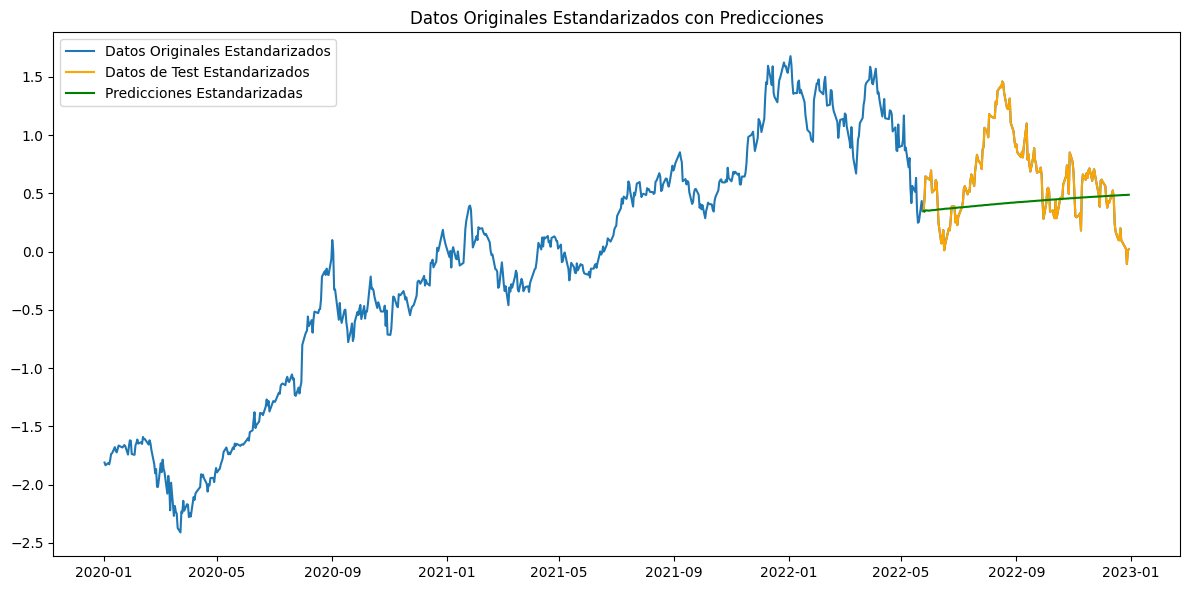

Mean Squared Error: 149.14260607645616


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Obtener los datos de una acción de Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Usar el precio de cierre ajustado para el análisis
closing_prices = data['Adj Close']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Ajustar un modelo autoregresivo (AR)
model = AutoReg(train, lags=5)  # Puedes ajustar el número de lags según sea necesario
model_fit = model.fit()

# Predicciones
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Estandarizar los datos
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices.values.reshape(-1, 1))
predictions_scaled = scaler.transform(predictions.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Graficar los datos estandarizados
plt.figure(figsize=(12, 6))

plt.plot(closing_prices.index, closing_prices_scaled, label='Datos Originales Estandarizados')
plt.plot(test.index, test_scaled, label='Datos de Test Estandarizados', color='orange')
plt.plot(test.index, predictions_scaled, label='Predicciones Estandarizadas', color='green')
plt.title('Datos Originales Estandarizados con Predicciones')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular el error cuadrático medio
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse}")


[*********************100%%**********************]  1 of 1 completed
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


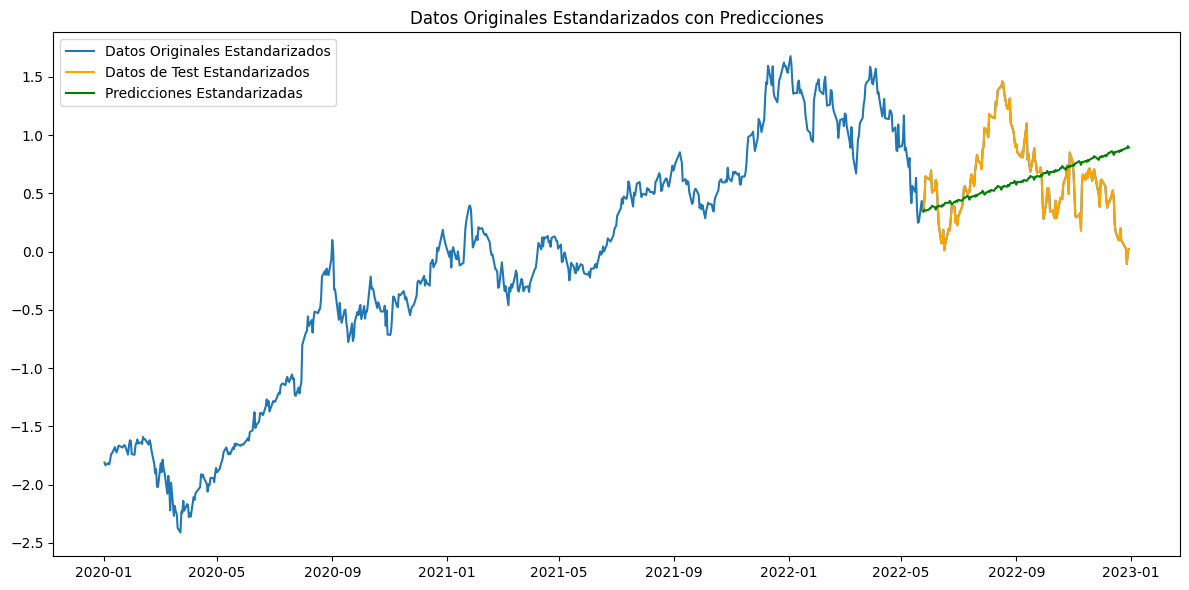

Mean Squared Error: 155.29469647801739


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Obtener los datos de una acción de Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Usar el precio de cierre ajustado para el análisis
closing_prices = data['Adj Close']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Ajustar un modelo de suavizamiento exponencial (Holt-Winters)
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Predicciones
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Estandarizar los datos
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices.values.reshape(-1, 1))
predictions_scaled = scaler.transform(predictions.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Graficar los datos estandarizados
plt.figure(figsize=(12, 6))

plt.plot(closing_prices.index, closing_prices_scaled, label='Datos Originales Estandarizados')
plt.plot(test.index, test_scaled, label='Datos de Test Estandarizados', color='orange')
plt.plot(test.index, predictions_scaled, label='Predicciones Estandarizadas', color='green')
plt.title('Datos Originales Estandarizados con Predicciones')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular el error cuadrático medio
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse}")
